<a href="https://colab.research.google.com/github/Sam1522/Bitcoin_Time_Series_Prediction/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PREDICTING THE PRICE OF BITCOIN**

#**Overview**

CoinMarketCap is the world's most-referenced price-tracking website for crypto assets in the rapidly growing cryptocurrency space. Its mission is to make crypto discoverable and efficient globally by empowering retail users with unbiased, high quality and accurate information for drawing their own informed conclusions. Founded by Brandon Chez in May 2013, CoinMarketCap has quickly grown to become the most trusted source by users, institutions, and media for comparing thousands of crypto assets and is commonly cited by CNBC, Bloomberg, and other major news outlets. (Even the U.S. government uses CoinMarketCap's data for research and reports!) CoinMarketCap stands firmly for accurate, timely and unbiased information.

#**Problem Statement**

Despite its popularity, the Bitcoin market is relatively new and has been subject to high volatility. There is a need to understand the factors that drive the price of Bitcoin, and to make predictions about future price movements. The information from our analysis will help potential investors to make sound decisions in regards to buying and selling of bitcoin.

#1. **Defining the question**

#1.1 Specifying the question

   What will bethe price of bitcoin in the next one year, that is, February, 2024?



#1.2 Defining the metrics of success   

In [1]:
# Loading required libraries
from bs4 import BeautifulSoup
import requests
import time
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Creating a function to get the time

def get_timestamp(datetime: str):
    return int(time.mktime(time.strptime(datetime, '%Y-%m-%d %H:%M:%S')))

# Creating a function to get the data
def get_btc_quotes(start_date: str, end_date: str):
    start = get_timestamp(start_date)
    end = get_timestamp(end_date)
    url = f'https://web-api.coinmarketcap.com/v1/cryptocurrency/ohlcv/historical?id=1&convert=USD&time_start={start}&time_end={end}'
    return requests.get(url).json()


data = get_btc_quotes(start_date='2012-12-01 00:00:00',
                      end_date='2023-12-10 00:00:00')



In [3]:
# Creating the DataFrame
data_flat = [quote['quote']['USD'] for quote in data['data']['quotes']]
df = pd.DataFrame(data_flat)

print(df)

              open          high           low         close        volume  \
0       134.444000    147.488007    134.000000    144.539993  0.000000e+00   
1       144.000000    146.929993    134.050003    139.000000  0.000000e+00   
2       139.000000    139.889999    107.720001    116.989998  0.000000e+00   
3       116.379997    125.599998     92.281898    105.209999  0.000000e+00   
4       106.250000    108.127998     79.099998     97.750000  0.000000e+00   
...            ...           ...           ...           ...           ...   
3583  24640.027221  25093.055150  24327.641672  24327.641672  2.555511e+10   
3584  24336.623340  25020.459513  23927.909253  24829.147570  2.898738e+10   
3585  24833.048914  25126.851686  24200.364116  24436.354485  3.125210e+10   
3586  24437.418480  24472.339757  23644.317716  24188.842977  3.020000e+10   
3587  24190.718984  24572.089421  23693.919485  23947.492523  3.047626e+10   

        market_cap                 timestamp  
0     1.603769e+

In [4]:
# Previewing the df
df

,open,high,low,close,volume,market_cap,timestamp
0,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09,2013-04-29T23:59:59.999Z
1,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,2013-04-30T23:59:59.999Z
2,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,2013-05-01T23:59:59.999Z
3,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,2013-05-02T23:59:59.999Z
4,106.250000,108.127998,79.099998,97.750000,0.000000e+00,1.085995e+09,2013-05-03T23:59:59.999Z
...,...,...,...,...,...,...,...
3583,24640.027221,25093.055150,24327.641672,24327.641672,2.555511e+10,4.694315e+11,2023-02-19T23:59:59.999Z
3584,24336.623340,25020.459513,23927.909253,24829.147570,2.898738e+10,4.791324e+11,2023-02-20T23:59:59.999Z
3585,24833.048914,25126.851686,24200.364116,24436.354485,3.125210e+10,4.715777e+11,2023-02-21T23:59:59.999Z
3586,24437.418480,24472.339757,23644.317716,24188.842977,3.020000e+10,4.668214e+11,2023-02-22T23:59:59.999Z


In [5]:
df.shape

(3588, 7)

In [6]:
# Checking for nulls
df.isnull().sum()

open          0
high          0
low           0
close         0
volume        0
market_cap    0
timestamp     0
dtype: int64

In [7]:
# Checking the column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        3588 non-null   float64
 1   high        3588 non-null   float64
 2   low         3588 non-null   float64
 3   close       3588 non-null   float64
 4   volume      3588 non-null   float64
 5   market_cap  3588 non-null   float64
 6   timestamp   3588 non-null   object 
dtypes: float64(6), object(1)
memory usage: 196.3+ KB


In [8]:
# Checking the column type. Timestamp is converted.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        3588 non-null   float64
 1   high        3588 non-null   float64
 2   low         3588 non-null   float64
 3   close       3588 non-null   float64
 4   volume      3588 non-null   float64
 5   market_cap  3588 non-null   float64
 6   timestamp   3588 non-null   object 
dtypes: float64(6), object(1)
memory usage: 196.3+ KB


In [9]:
#convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df.timestamp).dt.tz_localize(None)

In [10]:
# Previewing the table
df.head()

,open,high,low,close,volume,market_cap,timestamp
0,134.444000,147.488007,134.000000,144.539993,0.0,1.603769e+09,2013-04-29 23:59:59.999
1,144.000000,146.929993,134.050003,139.000000,0.0,1.542813e+09,2013-04-30 23:59:59.999
2,139.000000,139.889999,107.720001,116.989998,0.0,1.298955e+09,2013-05-01 23:59:59.999
3,116.379997,125.599998,92.281898,105.209999,0.0,1.168517e+09,2013-05-02 23:59:59.999
4,106.250000,108.127998,79.099998,97.750000,0.0,1.085995e+09,2013-05-03 23:59:59.999


In [11]:
#converting market_cap to 6 decimal points 
df['market_cap'] = df['market_cap'].apply("{:.06f}".format)

In [12]:
df.head()

,open,high,low,close,volume,market_cap,timestamp
0,134.444000,147.488007,134.000000,144.539993,0.0,1603768864.500000,2013-04-29 23:59:59.999
1,144.000000,146.929993,134.050003,139.000000,0.0,1542813125.000000,2013-04-30 23:59:59.999
2,139.000000,139.889999,107.720001,116.989998,0.0,1298954593.750000,2013-05-01 23:59:59.999
3,116.379997,125.599998,92.281898,105.209999,0.0,1168517495.250000,2013-05-02 23:59:59.999
4,106.250000,108.127998,79.099998,97.750000,0.0,1085995168.750000,2013-05-03 23:59:59.999


In [13]:
#converting volume to 6 decimal points 
df['volume'] = df['volume'].apply("{:.06f}".format)

In [14]:
df.head()

,open,high,low,close,volume,market_cap,timestamp
0,134.444000,147.488007,134.000000,144.539993,0.000000,1603768864.500000,2013-04-29 23:59:59.999
1,144.000000,146.929993,134.050003,139.000000,0.000000,1542813125.000000,2013-04-30 23:59:59.999
2,139.000000,139.889999,107.720001,116.989998,0.000000,1298954593.750000,2013-05-01 23:59:59.999
3,116.379997,125.599998,92.281898,105.209999,0.000000,1168517495.250000,2013-05-02 23:59:59.999
4,106.250000,108.127998,79.099998,97.750000,0.000000,1085995168.750000,2013-05-03 23:59:59.999


In [15]:
df.tail()

,open,high,low,close,volume,market_cap,timestamp
3583,24640.027221,25093.055150,24327.641672,24327.641672,25555105669.919998,469431477134.260010,2023-02-19 23:59:59.999
3584,24336.623340,25020.459513,23927.909253,24829.147570,28987376572.900002,479132405758.140015,2023-02-20 23:59:59.999
3585,24833.048914,25126.851686,24200.364116,24436.354485,31252098713.680000,471577656114.250000,2023-02-21 23:59:59.999
3586,24437.418480,24472.339757,23644.317716,24188.842977,30199996780.900002,466821375594.419983,2023-02-22 23:59:59.999
3587,24190.718984,24572.089421,23693.919485,23947.492523,30476264066.000000,462189287816.460022,2023-02-23 23:59:59.999


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   open        3588 non-null   float64       
 1   high        3588 non-null   float64       
 2   low         3588 non-null   float64       
 3   close       3588 non-null   float64       
 4   volume      3588 non-null   object        
 5   market_cap  3588 non-null   object        
 6   timestamp   3588 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 196.3+ KB


Change volume and market cap from object to float

In [17]:
#convert volume column from object to float
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

In [18]:
#convert market_cap column from object to float
df['market_cap'] = pd.to_numeric(df['market_cap'], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   open        3588 non-null   float64       
 1   high        3588 non-null   float64       
 2   low         3588 non-null   float64       
 3   close       3588 non-null   float64       
 4   volume      3588 non-null   float64       
 5   market_cap  3588 non-null   float64       
 6   timestamp   3588 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 196.3 KB


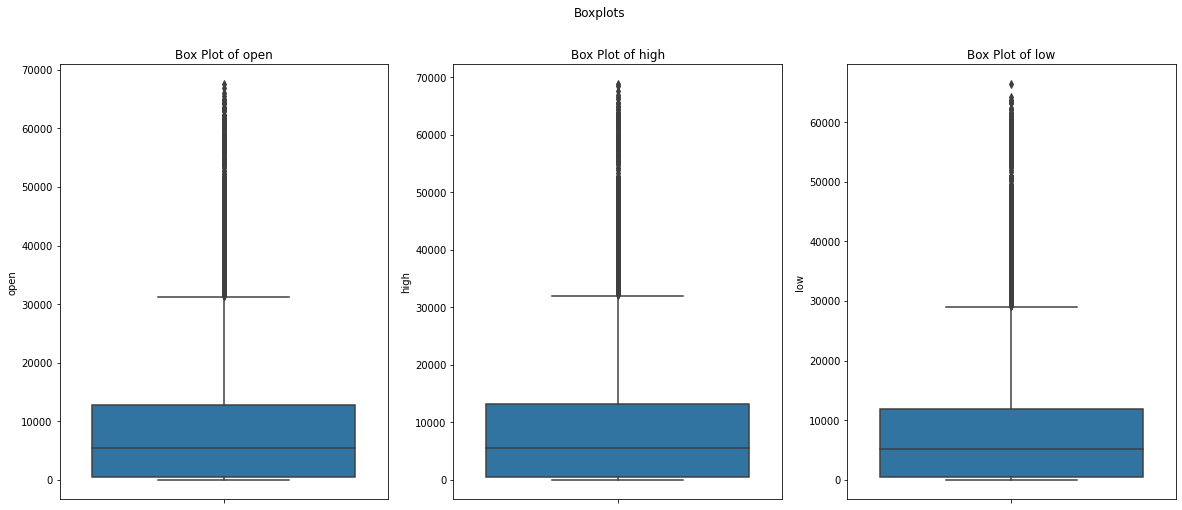

In [20]:
# Checking for Outliers

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df, y = "open", ax=ax[0])
ax[0].set_title('Box Plot of open')
sns.boxplot(data=df, y = "high", ax=ax[1])
ax[1].set_title('Box Plot of high')
sns.boxplot(data=df, y = "low", ax=ax[2])
ax[2].set_title('Box Plot of low')

plt.show()

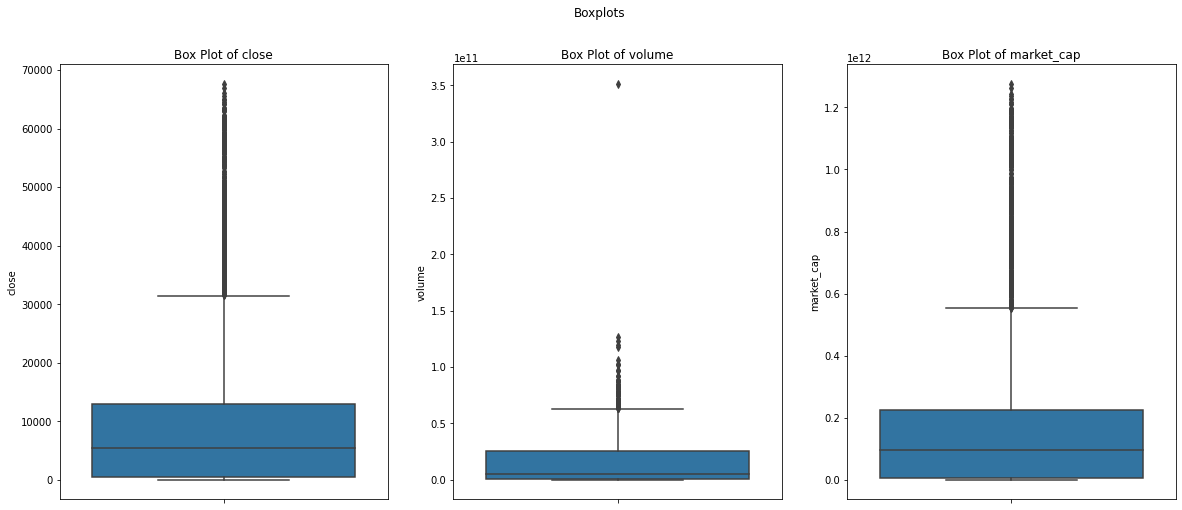

In [21]:
fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df, y = "close", ax=ax[0])
ax[0].set_title('Box Plot of close')
sns.boxplot(data=df, y = "volume", ax=ax[1])
ax[1].set_title('Box Plot of volume')
sns.boxplot(data=df, y = "market_cap", ax=ax[2])
ax[2].set_title('Box Plot of market_cap')

plt.show()

The data shows presence of outliers. The outliers indicate that there was a high varying of prices within a short time.

#Explaratory Data Analysis

# **Univariate Analysis**

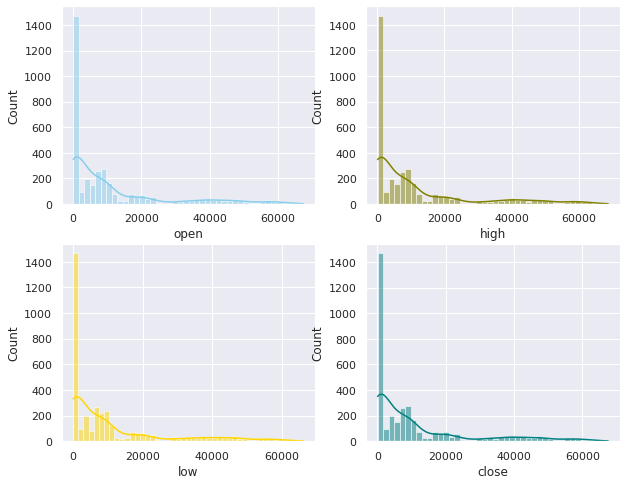

In [22]:
#histograms for open,high, low and close

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="open", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="high", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="low", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="close", kde=True, color="teal", ax=axs[1, 1])

plt.show()

The data distribution indicates positive skewness

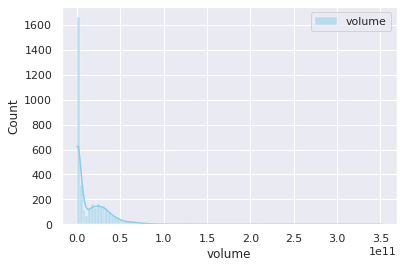

In [23]:
#histogram for volume

sns.histplot(data=df, x="volume", color="skyblue", label="volume", kde=True)

plt.legend() 
plt.show()

The data distribution indicates positive skewness

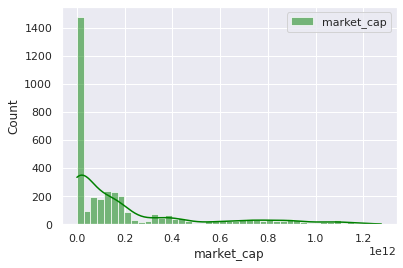

In [24]:
#histogram for market cap
sns.histplot(data=df, x="market_cap", color="green", label="market_cap", kde=True)

plt.legend() 
plt.show()

The data distribution indicates positive skewness

# **Bivariate analysis**

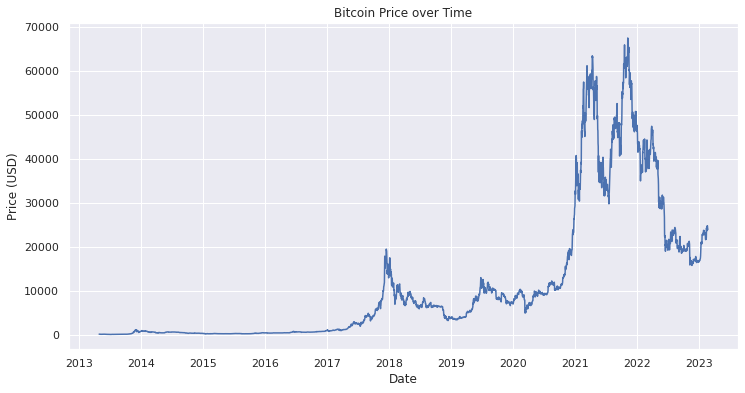

In [25]:
# Plot the Bitcoin price over time
# Set the figure size
plt.figure(figsize=(12, 6))

plt.plot(df['timestamp'], df['close'])
plt.title('Bitcoin Price over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


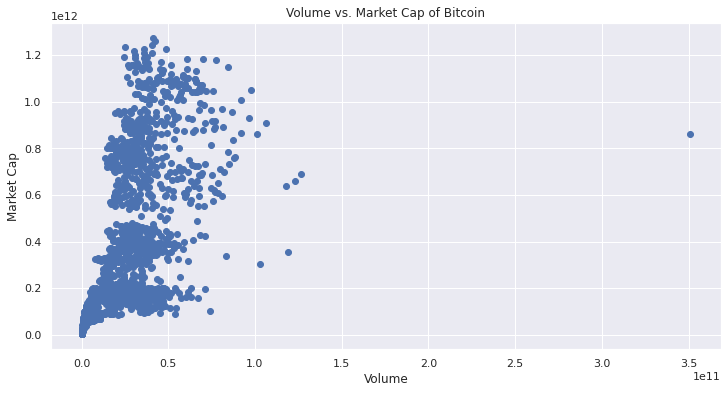

In [26]:
# Plot scatter the volume of Bitcon data
plt.figure(figsize=(12, 6))

plt.scatter(df['volume'], df['market_cap'])
plt.title('Volume vs. Market Cap of Bitcoin')
plt.xlabel('Volume')
plt.ylabel('Market Cap')
plt.show()


# **Multivariate Analysis**

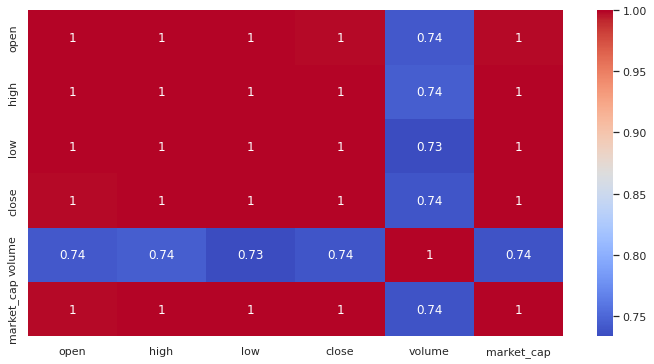

In [27]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot

plt.show()



# **Feature scalling**

In [28]:
# Normalize the data (this is optional, but it can help improve the performance of the model)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['open','high','low','close','volume','market_cap']] = scaler.fit_transform(df[['open','high','low','close','volume','market_cap']])

# **Split the data into training and testing sets**

The target is defined as the "close" column, and the features are the remaining columns after dropping the "close" column from the dataframe. We then split the data into training and test sets using train_test_split from the sklearn.model_selection module. The data is split into 80% training data (X_train, y_train) and 20% test data (X_test, y_test)

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('close',axis=1).values
y = df['close'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [30]:
df.head()

,open,high,low,close,volume,market_cap,timestamp
0,0.000977,0.001061,0.001033,0.001128,0.0,0.000648,2013-04-29 23:59:59.999
1,0.001119,0.001053,0.001033,0.001045,0.0,0.000600,2013-04-30 23:59:59.999
2,0.001045,0.000951,0.000636,0.000719,0.0,0.000409,2013-05-01 23:59:59.999
3,0.000709,0.000743,0.000403,0.000545,0.0,0.000306,2013-05-02 23:59:59.999
4,0.000559,0.000488,0.000205,0.000434,0.0,0.000241,2013-05-03 23:59:59.999


In [31]:
#Remove time from date and store it in a new column
df['new_timestamp'] =df.timestamp.dt.date
df.head()

,open,high,low,close,volume,market_cap,timestamp,new_timestamp
0,0.000977,0.001061,0.001033,0.001128,0.0,0.000648,2013-04-29 23:59:59.999,2013-04-29
1,0.001119,0.001053,0.001033,0.001045,0.0,0.000600,2013-04-30 23:59:59.999,2013-04-30
2,0.001045,0.000951,0.000636,0.000719,0.0,0.000409,2013-05-01 23:59:59.999,2013-05-01
3,0.000709,0.000743,0.000403,0.000545,0.0,0.000306,2013-05-02 23:59:59.999,2013-05-02
4,0.000559,0.000488,0.000205,0.000434,0.0,0.000241,2013-05-03 23:59:59.999,2013-05-03


In [32]:
#drop the timestamp column
df.drop('timestamp',axis = 1,inplace = True)

In [33]:
#convert new timestame to datetime
df['DateTime'] = pd.to_datetime(df['new_timestamp'], errors='coerce')

In [34]:
#drop the new timestamp column
df.drop('new_timestamp',axis = 1,inplace= True)

**Creating new dataframe of Bitcoin data containing only date and closing price**

In [35]:
closedf = df[['DateTime','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3588, 2)


In [36]:
closedf.head()

,DateTime,close
0,2013-04-29,0.001128
1,2013-04-30,0.001045
2,2013-05-01,0.000719
3,2013-05-02,0.000545
4,2013-05-03,0.000434


In [37]:
closedf = closedf[closedf['DateTime'] > '2013-04-29']
close_price = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  3587


In [38]:
#Normalizing close price value
from sklearn.preprocessing import MinMaxScaler

In [39]:
del closedf['DateTime']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(3587, 1)


Separating train data from test data

In [40]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2510, 1)
test_data:  (1077, 1)


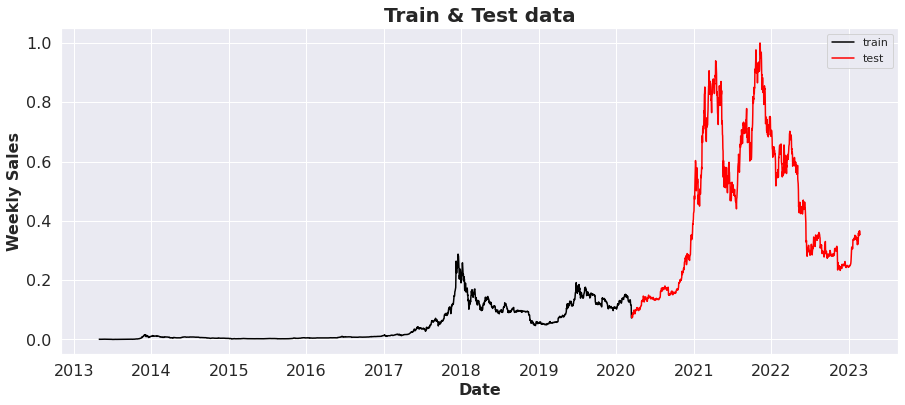

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_price['DateTime'][:2509], y = close_price['close'][:2509], color = 'black')
sns.lineplot(x = close_price['DateTime'][2509:], y = close_price['close'][2509:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))
plt.show()

Prepare train data for time series analysis

In [42]:
 #convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [43]:
time_step = 21
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_test:  (718, 6)
y_test (718,)
X_train:  (2488, 21)
y_train:  (2488,)


In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [45]:
# Building Model

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

[15:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [46]:
import math
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.21352882268525747
Root Mean squared Error - RMSE : 0.3013711638347943


In [47]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (2488, 1)
Test data prediction: (1055, 1)


In [48]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [49]:
# shift train predictions for plotting
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_price['DateTime'],
                       'original_close': close_price['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3587, 1)
Test predicted data:  (3587, 1)


In [50]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [51]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[22 23 24 25 26 27 28 29 30 31]


In [52]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Days'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [53]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# **Predicting the price of a bitcoin using Lstm**


Long Short-Term Memory (LSTM) models are a type of recurrent neural network capable of learning sequences of observations. This makes them a deep learning network well suited for time series forecasting. However, usually a LTSM would struggle with a time series dataset as volatile and unpredictable as Bitcoin. After a grueling process of trying to apply my data, I finally trained the model. In my final fit I used 50 epochs and the “adam” optimizer.

In [54]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf

In [55]:
df.head()

,open,high,low,close,volume,market_cap,DateTime
0,0.000977,0.001061,0.001033,0.001128,0.0,0.000648,2013-04-29
1,0.001119,0.001053,0.001033,0.001045,0.0,0.000600,2013-04-30
2,0.001045,0.000951,0.000636,0.000719,0.0,0.000409,2013-05-01
3,0.000709,0.000743,0.000403,0.000545,0.0,0.000306,2013-05-02
4,0.000559,0.000488,0.000205,0.000434,0.0,0.000241,2013-05-03


In [56]:
#make another copy
df1=df.copy()

In [57]:
price = df1.close
# As usual split data, 70, 30
X = price
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data using minMaxScaler
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
# assign training values
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [58]:
# creates model
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [59]:
model.compile(loss="mean_squared_error",optimizer="adam")


In [60]:
# fit the model to the training data
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
79/79 [==============================] - 2s 2ms/step - loss: 0.0527
Epoch 2/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0325
Epoch 3/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 4/50
79/79 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 5/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 6/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 7/50
79/79 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 8/50
79/79 [==============================] - 0s 2ms/step - loss: 8.3833e-04
Epoch 9/50
79/79 [==============================] - 0s 2ms/step - loss: 4.7688e-04
Epoch 10/50
79/79 [==============================] - 0s 3ms/step - loss: 4.1279e-04
Epoch 11/50
79/79 [==============================] - 0s 3ms/step - loss: 4.0185e-04
Epoch 12/50
79/79 [==============================] - 0s 4ms/step - loss: 3.9429e-04
Epoch 13/50
79/79 [==========

In [61]:
# assign test and predicted values + reshaping + converting back from scaler
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

34/34 [==============================] - 0s 1ms/step


In [62]:
test_df

2511    0.076030
2512    0.078874
2513    0.073277
2514    0.076405
2515    0.076595
          ...   
3583    0.359404
3584    0.366834
3585    0.361015
3586    0.357348
3587    0.353772
Name: close, Length: 1077, dtype: float64

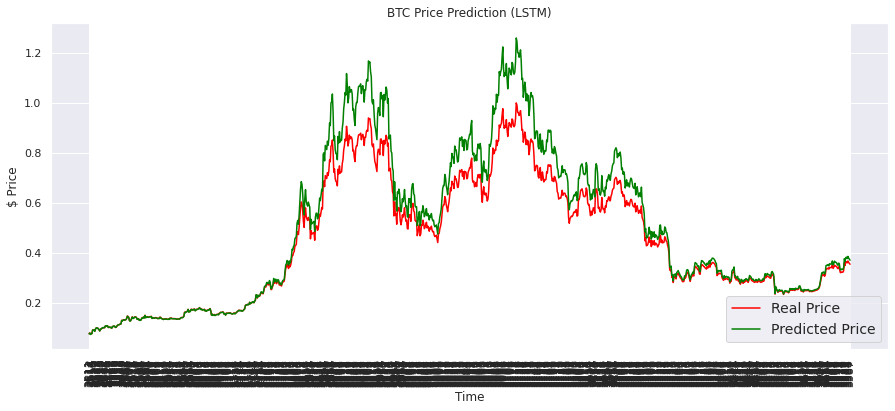

In [63]:
# plotting the results
plt.figure(figsize=(15, 6))
ax = plt.gca()  
plt.plot(test_df.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('BTC Price Prediction (LSTM)')
test_df = test_df.reset_index()
x= test_df.index
labels = test_df['index']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [64]:
rmse = np.sqrt(mean_squared_error(test_df.close.values, predicted_price))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.085


#DEPLOYING THE MODEL